# AIN212 : Elements of Data Science
## Course Project
### Melike Nur DULKADİR - 21992919

### PROBLEM DEFINITION :


In this project, we need to perform all the tasks in the life cycle of an experiment on a data science topic we choose.

For this, we have to follow the steps below in order:

- Data Collection
- Data Preprocessing and Cleaning
- Data Exploration
- Feature Engineering
- Predictive Modelling
- Data Visualization

In [64]:
# Installing necessary modules from the text file
!pip install -r requirements.txt

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Util functions

In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_curve, plot_precision_recall_curve

def display_confusion_matrix(confusion_matrix):
    # Heatmap display for confusion matrix
    labels = ["True Neg","False Pos","False Neg","True Pos"]
    length = len(max(labels))+10
    labels = np.asarray(labels).reshape(2,2)

    annots = [f"{str(label)}({str(value)})" for array in np.dstack((labels,confusion_matrix)) for (label, value) in array]
    annots = np.asarray(annots).reshape(2,2).astype(str)
    plt.figure(figsize = (12,7))
    plt.title("Confusion Matrix of LogReg")
    sns.heatmap(confusion_matrix, annot=annots, fmt=f".{length}")
    plt.show()

In [67]:
def logistic_roc_curve(y_test, predictions):
    log_fpr, log_tpr, log_threshold = roc_curve(y_test, predictions)
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])

In [68]:
def print_metric(y_test,predictions):
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    _confusion_matrix = confusion_matrix(y_test, predictions)
    display_confusion_matrix(_confusion_matrix)
    print(f"Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}")

###  1- Data Collection

In this step, we will choose an existing dataset and follow the above steps one by one. Before, it is requested to get the subsample of the selected dataset.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. In this dataset, there are pre-transformed transaction data, time and amount values as features. As a result, there is a label according to whether the relevant example is fraud or non fraud. This information is also included in the class column.

- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. We also know that the full meaning of these features is not given in terms of privacy.

- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

- Feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

 You can access the dataset from this link : [Dataset link](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [1]:
# Reading the data file
import gdown

url = 'https://drive.google.com/uc?id=1IJhLV_lt2q6F5NC5XD3mpucR_x6-8Xi5'
output = 'creditcard.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv("creditcard.csv")

Downloading...
From: https://drive.google.com/uc?id=1IJhLV_lt2q6F5NC5XD3mpucR_x6-8Xi5
To: C:\Users\uqi\Desktop\21992919\creditcard.csv
 18%|█▊        | 27.8M/151M [00:01<00:07, 16.8MB/s]

KeyboardInterrupt: 

In [70]:
# The dataframe looks like this
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [71]:
# There is a big difference between the number of our positive and negative samples. To balance this and provide good training, we will apply various processes in the data preprocessing and cleaning step.
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [72]:
# As you can see, the distribution of classes in our data is very uneven and imbalanced.
print("No fraud samples make up", round(df["Class"].value_counts()[0]/len(df) * 100,2), "% of the dataset.")
print("Fraud samples make up", round(df["Class"].value_counts()[1]/len(df) * 100,2), "% of the dataset.")

No fraud samples make up 99.83 % of the dataset.
Fraud samples make up 0.17 % of the dataset.


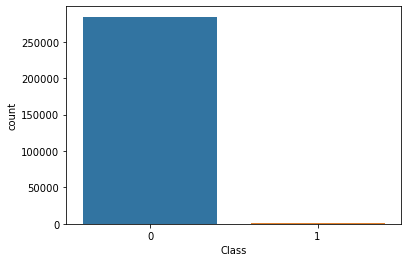

In [73]:
sns.countplot(x="Class", data=df);

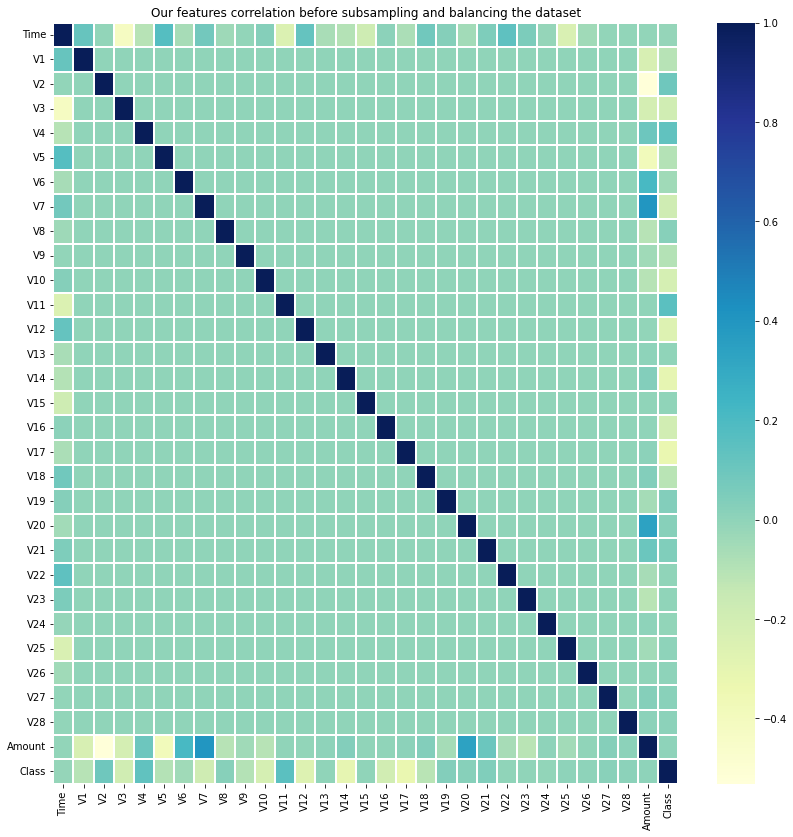

In [74]:
plt.figure(figsize = (14,14))
plt.title("Our features correlation before subsampling and balancing the dataset")
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="YlGnBu")
plt.show()

It is necessary to use a correlation map to see if some features in our dataset directly and seriously affect the class result.

Since this correlation table contains data before subsampling, it is not correct to comment. Because our correlation matrix will be affected by high imbalance. We will make a more accurate interpretation after balancing.

###  2- Data Preprocessing and Cleaning

In this step, we will apply preprocess operations such as scaling and cleaning in order to remove the noises in the selected dataset.

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions do not work correctly without normalization(scaling). So that, we will scale some of our features.


In [75]:
tmp = df[["Amount","Class"]].copy()
class_0 = tmp.loc[tmp["Class"] == 0]["Amount"]
class_1 = tmp.loc[tmp["Class"] == 1]["Amount"]

In [76]:
class_0.describe()
# WARNING: If the csv file is downloaded from the drive, errors may appear in this step. If the dataset is downloaded manually from the link given in the first part, this part will give correct results.

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [77]:
class_1.describe()
# WARNING: If the csv file is downloaded from the drive, errors may appear in this step. If the dataset is downloaded manually from the link given in the first part, this part will give correct results.

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [78]:
from sklearn.preprocessing import RobustScaler
# We will use robust scaler. It scales features using statistics that are robust to outliers.
# This scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

robust_scaler = RobustScaler()
df["scaled_time"] = robust_scaler.fit_transform(df["Time"].values.reshape(-1, 1))
df["scaled_amount"] = robust_scaler.fit_transform(df["Amount"].values.reshape(-1, 1))

df.drop(["Time","Amount"], axis=1, inplace=True)

scaled_amount = df["scaled_amount"]
scaled_time = df["scaled_time"]

df.drop(["scaled_amount","scaled_time"], axis=1, inplace=True)
df.insert(0, "scaled_amount", scaled_amount)
df.insert(1, "scaled_time", scaled_time)

# Our scaled features (time, amount) look like this.
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


As mentioned above, the robust scaler uses the Interquartile Range Method. This method can be explained as follows:

- After sorting our dataset, we divide it into 4 equal parts.
- Then we determine the 25 percent and 75 percent parts. (first and last part)
- We add a threshold to these limits.
- We delete all samples outside these threshold added limits from the dataset by counting them as outliers.

There is a tradeoff when deleting the Outlier. The larger the threshold we use when creating thresholds for the deletion of the outliers, the fewer outliers will be detected. If we lower the threshold, many more outliers will be detected.

**Note**: For this tradeoff, we have to take into account. If we lower this threshold, we will delete more outliers. But if we want to focus on extreme outliers instead of just the outliers, it may not be a situation where we want to lower the threshold. Because even extreme outliers can sometimes have an effect as a result of inference. Information loss may occur because we remove them.

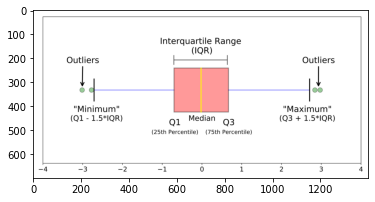

In [79]:
import matplotlib.image as mpimg
img = mpimg.imread("outlier.png")
imgplot = plt.imshow(img)

[Image link](https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21)


**Warning**: Random Under-Sampling can be predicted to produce an undesirable result. Because when applying this technique, we choose a small majority class subsample from a very large majority class dataset, so the loss of information will be high.

In [80]:
# Thanks to the resample function in this helper class, we will be able to resampling in the pipeline. We will see the differences according to whether this process is done before and during the CV in the predictive modeling section.
from sklearn.base import BaseEstimator

class RandomUnderSamplerHelper(BaseEstimator):

    def __init__(self,random_state=None):
        self.random_state = random_state

    def fit_resample(self, X, y):
        return self.resample(X, y) # Pipeline calls this function.

    def resample(self, X, y):
        df = pd.concat([X, y], axis=1)

        df = df.sample(frac=1, random_state=self.random_state)

        # In order to provide a good training, we need to use a 50/50 sub-dataframe (NearMiss Algorithm). However, since a training+test set with at least 4000 data points is requested from us, we will make a split accordingly.
        fraud_df = df.loc[df["Class"] == 1]  # 492(all of them) fraud sample selected.
        non_fraud_df = df.loc[df["Class"] == 0][:3508] # 3508 non-fraud sample selected.

        # Concatenating dataframes.
        distributed_df = pd.concat([fraud_df, non_fraud_df])

        # Shuffling dataframe rows.
        new_df = distributed_df.sample(frac=1, random_state=1)

        X = new_df.loc[:,new_df.columns != "Class"]
        y = new_df.loc[:,["Class"]]

        return X, y

###  3- Data Exploration and Analysis

In this step, we will examine and analyze all the information in our dataset. Finally, we need to do clustering.

If we trained our model with imbalanced data, false accuracy would be given as there would be a high bias to non fraud samples.

Situations that may occur as a result of training with Imbalanced data:

- Overfitting: Our model would predict most instances as non fraud due to instability in the training set. However, we want a precise result in the prediction of cases with fraud and we will measure this with other accuracy metrics. (We want to detect patterns of sign that given sample is fraud, not to assume.)

- Correlation errors: It is important to use balanced data to see the effect of V features on the label result.

So that, we did under-sampling. (Over-sampling (SMOTE) could be also done, but we want less data.)

Distribution of the classes in the subsample dataset
0    0.877
1    0.123
Name: Class, dtype: float64


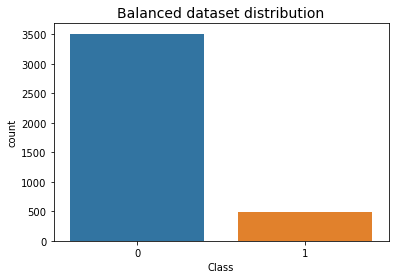

In [81]:
# As you can see, the distribution of classes in our data now have slightly better balance.
random_sampler = RandomUnderSamplerHelper()
newDf_X = df.loc[:,df.columns != 'Class']
newDf_y = df.loc[:,['Class']]

random_sampled_x, random_sampled_y = random_sampler.fit_resample(newDf_X,newDf_y)
df1 = pd.DataFrame(random_sampled_x)
df2 = pd.DataFrame(random_sampled_y)
new_df = pd.concat([df1,df2], axis=1)

print("Distribution of the classes in the subsample dataset")
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot("Class", data=new_df)
plt.title("Balanced dataset distribution", fontsize=14)
plt.show()

In [82]:
non_fraud = new_df[new_df["Class"] == 0]
fraud = new_df[new_df["Class"] == 1]

# Shape of our dataframe elements.
data = {"Class": ["Non-Fraud","Fraud"], "Shape": [non_fraud.shape,fraud.shape]}
info_df = pd.DataFrame(data)
info_df

,Class,Shape
0,Non-Fraud,"(3508, 31)"
1,Fraud,"(492, 31)"


In [83]:
# Our dataframe's new shape.
new_df.shape

(4000, 31)

In [84]:
# Our features after inserting scaled ones.
new_df.columns

Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')

In [85]:
# Statistics of the data.
new_df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1.015715,0.081895,-0.634466,0.408539,-0.865885,0.616196,-0.375223,-0.153548,-0.679314,0.034675,-0.281226,-0.678990,0.460440,-0.747597,-0.025946,-0.842908,-0.002404,-0.516531,-0.797083,-0.301948,0.075997,0.038374,0.069449,-0.004344,-0.014485,-0.013968,-0.003549,0.004968,0.022278,0.012039,0.123000
std,3.330574,0.558428,3.509745,2.608043,3.676345,2.237121,2.484948,1.465428,3.309019,2.663401,1.588326,2.729593,1.814639,2.773363,0.996850,2.863773,0.943775,2.072968,3.355902,1.476154,0.973481,1.019865,1.553706,0.871736,0.861328,0.600845,0.573323,0.487339,0.605508,0.418812,0.328478
min,-0.307413,-0.993997,-41.928738,-40.803981,-31.103685,-4.756129,-22.105532,-12.299495,-43.557242,-41.044261,-13.434066,-24.588262,-2.875083,-18.683715,-3.366144,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-18.795086,-22.797604,-8.887017,-21.303666,-2.822384,-4.781606,-1.350031,-7.263482,-6.129245,0.000000
25%,-0.237965,-0.387261,-1.159918,-0.524359,-1.346085,-0.676099,-0.835941,-0.862919,-0.745792,-0.209244,-0.840080,-0.752696,-0.660873,-0.689850,-0.672948,-0.704401,-0.583556,-0.739463,-0.601621,-0.670787,-0.481951,-0.209083,-0.227136,-0.548658,-0.177283,-0.366371,-0.318855,-0.321733,-0.069208,-0.052719,0.000000
50%,-0.002166,-0.031855,-0.203148,0.175714,-0.027496,0.230704,-0.155759,-0.320906,-0.054412,0.043272,-0.109153,-0.194187,0.134986,0.040003,-0.019219,-0.069301,0.025761,-0.049238,-0.115664,-0.093950,0.036662,-0.046433,-0.009198,0.001755,-0.011985,0.038722,0.011426,-0.032183,0.010049,0.015098,0.000000
75%,0.852372,0.612945,1.251305,1.046504,0.916545,1.218609,0.617099,0.348562,0.543650,0.423950,0.564137,0.343487,1.015480,0.577925,0.651698,0.417756,0.658595,0.463330,0.392392,0.440036,0.560629,0.185916,0.249044,0.534652,0.162973,0.419081,0.361187,0.272420,0.129976,0.098637,0.000000
max,60.476490,1.033882,2.394434,22.057729,3.775152,12.114672,17.479929,7.884370,14.203189,20.007208,6.178566,10.888676,12.018913,4.574082,3.789116,7.667726,5.720479,6.442798,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.911243,1.620462,3.003097,2.745261,5.417347,9.677347,1.000000


In [102]:
# Samples do not have any features as Null values. So there is no need to bother to replace it.
df.isnull().sum()
# WARNING: If the csv file is downloaded from the drive, errors may appear in this step. If the dataset is downloaded manually from the link given in the first part, this part will give correct results.

scaled_amount    0
scaled_time      0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Class            0
dtype: int64

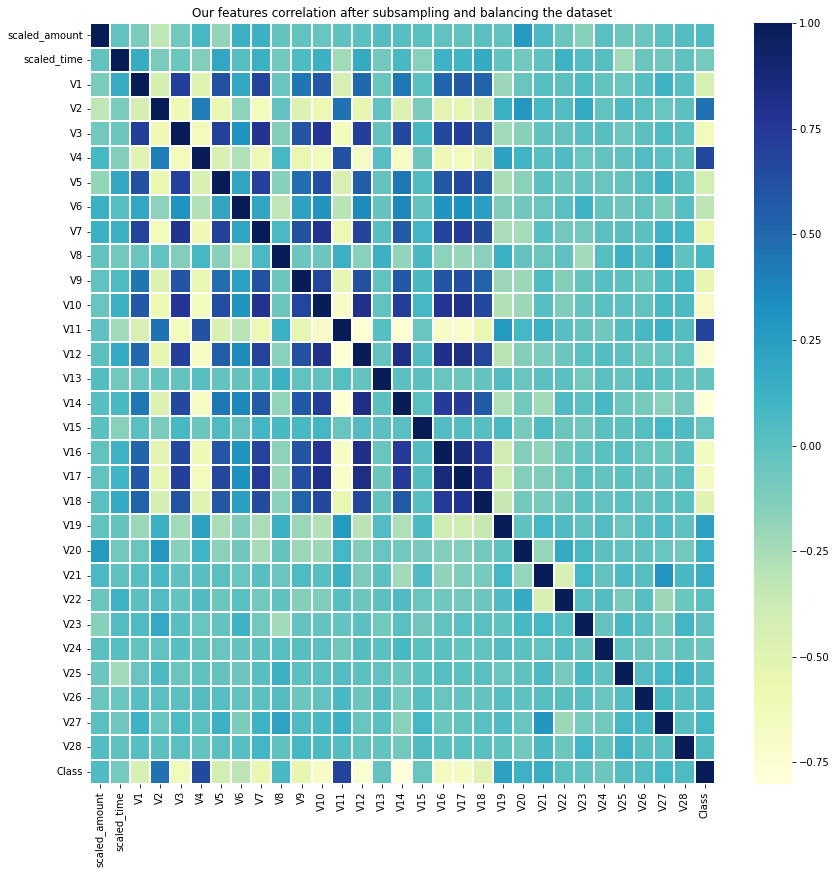

In [87]:
# Correlation map after under-sampling. It would be more appropriate to examine the correlation map that we created from this subsample.
plt.figure(figsize = (14,14))
plt.title("Our features correlation after subsampling and balancing the dataset")
corr = new_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="YlGnBu")
plt.show()

It is important to comment on the correct correlation map (sub-sampled).

*Positive correlation* : V2, V4 and V11 are positively correlated. A higher correlation indicates that, that feature of the sample has a higher impact on the likelihood of fraudulence as a result.

*Negative correlation* : V14, V12, V17 are negatively correlated. A lower correlation value indicates that, that feature of the sample has a higher impact on the likelihood of fraudulence as a result.

#### Clustering

In [88]:
from sklearn.manifold import TSNE

In [89]:
X = new_df.drop("Class", axis =1)
y = new_df["Class"]

#t-SNE algorithm
reduced_X_tSNE = TSNE(n_components=2, random_state=8).fit_transform(X.values)

The t-SNE algorithm can cluster the samples with very good accuracy, depending on whether they are fraudulent or non fraudulent.

In [90]:
import matplotlib.patches as mpatches

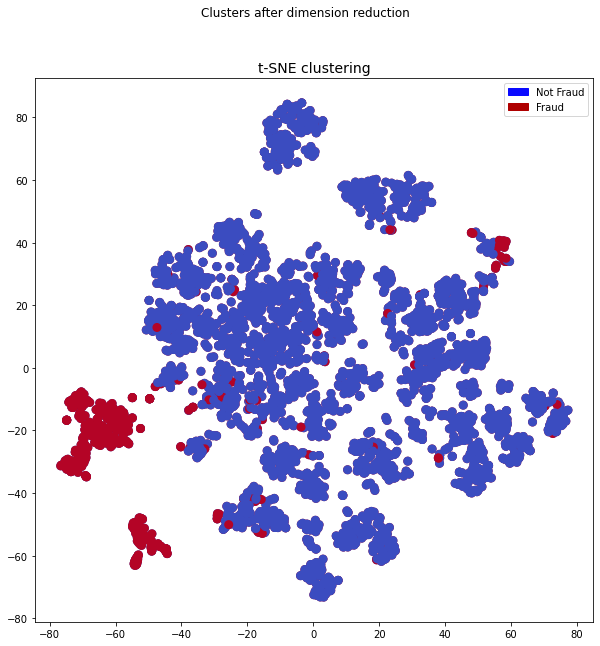

In [91]:
# Visualization after dimension reduction algorithm
f, (ax1) = plt.subplots(1, 1, figsize=(10,10))
f.suptitle("Clusters after dimension reduction")

#t-SNE scatter plot
ax1.scatter(reduced_X_tSNE[:,0], reduced_X_tSNE[:,1], c=(y == 0), cmap="coolwarm", label="No Fraud", linewidths=3)
ax1.scatter(reduced_X_tSNE[:,0], reduced_X_tSNE[:,1], c=(y == 1), cmap="coolwarm", label="Fraud", linewidths=3)
ax1.set_title("t-SNE clustering", fontsize=14)
ax1.grid(False)

blue_legend = mpatches.Patch(color="#0A0AFF", label="Not Fraud")
red_legend = mpatches.Patch(color="#AF0000", label = "Fraud")
ax1.legend(handles=[blue_legend, red_legend])

The t-SNE algorithm can cluster the samples with very good accuracy, depending on whether they are fraudulent or non fraudulent. This algorithm is used to visualize high-dimensional data by making it low-dimensional without much data loss.

This image can allow us to make an inference about whether predictive models can work properly on our dataset.

###  4- Predictive Modelling



In this step, we will use logistic regression to classify a sample as fraud or non fraud. We could choose the best one by considering the performance of other classifiers and regressors, but it is more important here that our code works fast and that a reliable predictor is created.

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("Class", axis =1), # Splitting very large dataset into training and test.
                                                    df["Class"],
                                                    test_size=0.2,
                                                    stratify=df["Class"],
                                                    random_state=11)


At this stage, we will do the random undersampling technique **during** cross validation. By sending the undersampled dataset to the gridsearch object, we will select the best hyperparameters for the logistic regression classifier by randomly undersampling in each cross validation iteration.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

# Here, we prepare the estimator that we will send into GridSearchCV using imbpipeline.
# Using the pipeline, a different subsample will be created by gridsearch in each iteration.
pipeline1 = imbpipeline([('randomhelper', RandomUnderSamplerHelper(random_state=11)),
                        ('classifier', LogisticRegression(random_state=11,max_iter=1000))])


# This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.
stratified_kfold = StratifiedKFold(n_splits=3,
                                   shuffle=True,
                                   random_state=11)

# Possible hyperparameters for LogReg.
param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100]}

# Choosing best Logistic Regression model with the best hyperparameters.
undersample_during_cv_grid_search = GridSearchCV(estimator=pipeline1,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

undersample_during_cv_grid_search.fit(X_train, y_train)
cv_score = undersample_during_cv_grid_search.best_score_
test_score = undersample_during_cv_grid_search.score(X_test, y_test) # Printing cross validation and test roc scores.
print(f'Cross-validation roc-auc score: {cv_score}\nTest score: {test_score}')

NameError: name 'RandomUnderSamplerHelper' is not defined

At this stage, we will do the random undersampling technique **before** cross validation. We will select the best hyperparameters for the logistic regression classifier by sending the undersampled dataset to the gridsearch object.

In [94]:
random_sampled = RandomUnderSamplerHelper(random_state = 11) # Creating random undersampler helper object.
X_train, y_train = random_sampled.fit_resample(X_train, y_train) # Random undersampling only once.

# Here, there is only a regressor in our pipeline. In this way, after performing random undersampling only once, we will be able to send the relevant subsample data into fit.
pipeline2 = Pipeline([('classifier', LogisticRegression(random_state=11, max_iter=1000))])

# Choosing best Logistic Regression model with the best hyperparameters.
undersample_before_cv_grid_search = GridSearchCV(estimator=pipeline2,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

undersample_before_cv_grid_search.fit(X_train, y_train)
cv_score = undersample_before_cv_grid_search.best_score_
test_score = undersample_before_cv_grid_search.score(X_test, y_test) # Printing cross validation and test roc scores.
print(f'Cross-validation roc-auc score: {cv_score}\nTest score: {test_score}')

Cross-validation roc-auc score: 0.9804112910548893
Test score: 0.9895016250732145


###  5- Model Evaluation and Visualizations

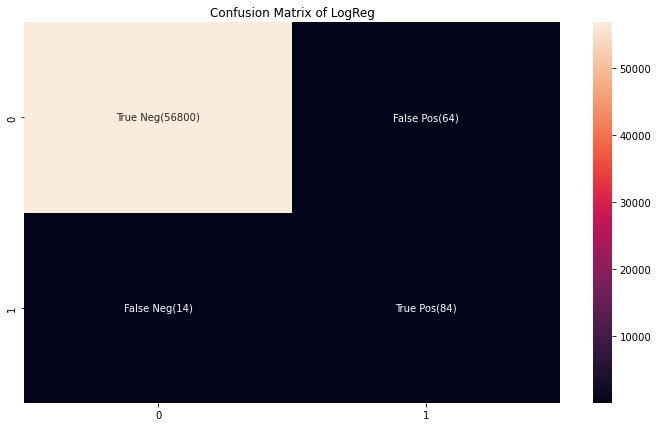

Precision: 0.5675675675675675, Recall: 0.8571428571428571, F1: 0.6829268292682926, Accuracy: 0.9986306660580738


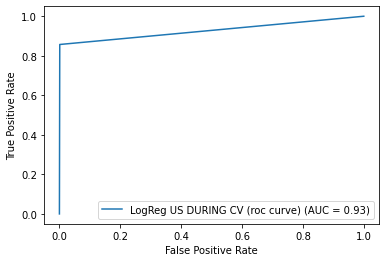

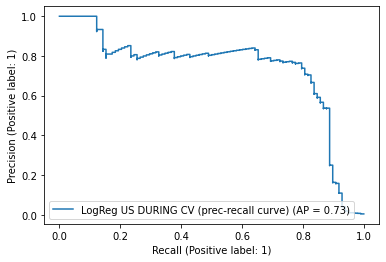

In [95]:
from sklearn import metrics

# US stands for "undersampling" on the graphs.

predictions_undersample_during_cv = undersample_during_cv_grid_search.predict(X_test) # Model evaluation.

print_metric(y_test,predictions_undersample_during_cv) # Printing all the metric scores with test results.
fpr, tpr, thresholds = roc_curve(y_test, predictions_undersample_during_cv) # Calculating Roc curve values.
roc_auc = metrics.auc(fpr, tpr) # Calculating auc value.
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name="LogReg US DURING CV (roc curve)") # Displaying roc curve.
display.plot()
plt.show()

plot_precision_recall_curve(undersample_during_cv_grid_search, X_test, y_test, name = 'LogReg US DURING CV (prec-recall curve)') # Displaying prec-recall curve.

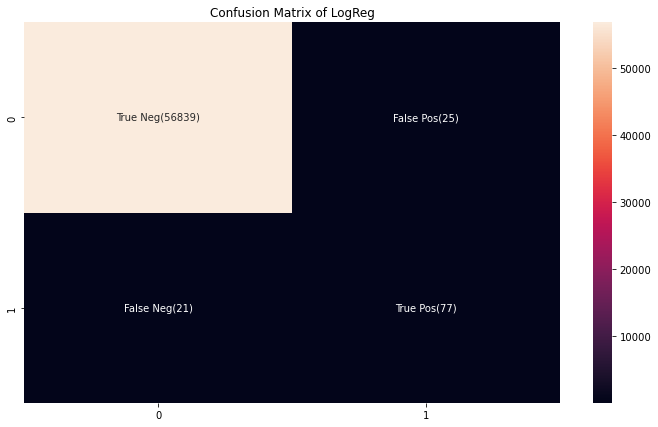

Precision: 0.7549019607843137, Recall: 0.7857142857142857, F1: 0.7700000000000001, Accuracy: 0.9991924440855307


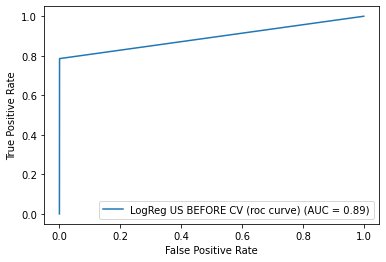

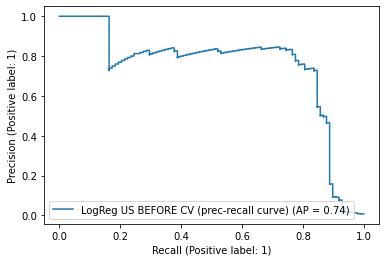

In [96]:
predictions_undersample_before_cv = undersample_before_cv_grid_search.predict(X_test) # Model evaluation.

print_metric(y_test,predictions_undersample_before_cv) # Printing all the metric scores with test results.
fpr, tpr, thresholds = roc_curve(y_test, predictions_undersample_before_cv) # Calculating Roc curve values.
roc_auc = metrics.auc(fpr, tpr) # Calculating auc value.
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name="LogReg US BEFORE CV (roc curve)") # Displaying roc curve.
display.plot()
plt.show()

plot_precision_recall_curve(undersample_before_cv_grid_search, X_test, y_test, name = 'LogReg US BEFORE CV (prec-recall curve)')

###  CONCLUSION and EVALUATION

Commenting graphs:

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

Generally, the higher the AP score, the better a classifier performs for the given task. One way to calculate AUC-PR is to find the AP, or average precision. In a perfect classifier, AUC-PR =1.





When we look at the visualization results, the values in our confusion matrixes are close to each other. In addition, our metric scores are also indicated. When we look at the metric scores, the scores are higher when random undersampling is done before cross validation. However, this is not enough to make an inference. We can make extra interpretations on the ROC and Precision-Recall curves we have drawn.

Our Roc curves turned out to be similar to each other. However, when random undersampling was performed during cross validation, our UAC-ROC score was higher. Our Precision-Recall curves are very similar to each other and our average precision scores are also equal.

In this case, as we know from research, if we try to balance our dataset during cross validation, we will avoid overfit. If we did random undersampling at first and then fine-tuned our model, the model would be overfit.

In addition, we should not do undersampling on our test set when using predict in our model, that is, when using test sets. This should be noted.

#### As a result, our Logistic Regression model, whose random undersampling is performed during cross validation, gives safer and better results.